# Capstone Project Data Science: WhatsApp Chat Analysis

### Project description: 
You can use your WhatsApp data for many data science tasks like sentiment analysis, keyword extraction, named entity recognition, text analysis and several other natural language processing tasks. It also depends on who you are analysing your WhatsApp messages with because you can find a lot of information from your WhatsApp messages which can also help you to solve business problems.

In this project you are expected to perform the analysis on the WhatsApp chat data and share the insights of it,

1.	Loading the chat data into python environment

2.	Defining the specific function or methods for preprocessing the text data

3.	Incorporating NLP techniques for cleaning the text data
                                
4.	Creating Word Clouds of the processed chat data
                                
5.	Save the images of word cloud into your system.
                                
6.	Extracting information through sentiment analysis.

Before starting with the task of WhatsApp Chat analysis with Python you need to extract your WhatsApp data from your smartphone which is a very easy task. To extract your WhatsApp chats, just open any chat with a person or a group and follow the steps mentioned below:

If you are having an iPhone, then tap on the Contact Name or the Group Name. In case you are having an Android smartphone then tap on the 3 dots of top right.

1. Then scroll to the bottom and top on Export Chat.
    
2. Then select without media for simplicity if it asks you whether you want your chats with or without media.

3. Then email this chat to yourself and download it to your system. 

So, this is how you can easily get your WhatsApp chats with any person or a group for the task of WhatsApp chat analysis.
 


## Import all necessory libraries

In [1]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.ticker import MaxNLocator
from plotly import express as px
import seaborn as sns
from datetime import *
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

###  Detecting {Date} and {Time} tokens

In [2]:
def startsWithDate(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False


##  Detecting the {Author} token

In [3]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = regex.match(pattern, s)
    if result:
        return True
    return False
     

## Extracting and Combining tokens

In [ ]:
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if startsWithAuthor(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message
     

##  Parsing the entire file and handling Multi-Line Messages

In [5]:
data = []
conversation = (r'C:\Users\AK\Desktop\eduonix assignment\chat_analysis\data\chat_data.txt')
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [6]:

df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])

In [7]:
df


,Date,Time,Author,Message
0,05/02/2020,10:00 am,Ed,We share our knowledge here and pass year
1,05/02/2020,10:01 am,Ed,<Media omitted>
2,05/02/2020,10:01 am,Ed,Easy to communicate 🤣🤣🤣
3,05/02/2020,10:01 am,Rohit,💪🏾
4,05/02/2020,10:01 am,Rohit,yeah
...,...,...,...,...
4691,20/09/2020,5:32 pm,Ed,who have finish math lecture ?
4692,21/09/2020,2:25 pm,Ed,You deleted this message
4693,21/09/2020,2:26 pm,Ed,<Media omitted>
4694,21/09/2020,2:26 pm,Rohit,onz onz


In [23]:

df.tail(20)

,Date,Time,Author,Message
4676,18/09/2020,7:51 pm,Ed,😂 😂
4677,18/09/2020,7:51 pm,Rohit,She marking maybe
4678,18/09/2020,7:51 pm,Rohit,G3 few only marked right
4679,18/09/2020,7:51 pm,Rohit,I saw morning like 3 groups only
4680,20/09/2020,12:51 pm,Ed,<Media omitted>
4681,20/09/2020,12:52 pm,Ed,I see kk I can hidden it
4682,20/09/2020,12:53 pm,Rohit,Because we have shared alot private things her...
4683,20/09/2020,12:53 pm,Rohit,Np np
4684,20/09/2020,12:53 pm,Ed,OK Bro no worry
4685,20/09/2020,12:53 pm,Ed,@60183560200 can?


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4696 non-null   object
 1   Time     4696 non-null   object
 2   Author   4696 non-null   object
 3   Message  4696 non-null   object
dtypes: object(4)
memory usage: 146.9+ KB


In [8]:
#----- Authors in the chat
df.Author.unique()

array(['Ed', 'Rohit'], dtype=object)

In [9]:
#------ Displaying total number of messeges in the chat
total_messages = df.shape[0]
print(total_messages)
     

4696


## Performing EDA for analyzing chat data

In [13]:
df.shape

(4696, 4)

In [14]:
df.isnull().sum()

Date       0
Time       0
Author     0
Message    0
dtype: int64

In [16]:
df = df.dropna()
df = df.reset_index(drop=True)
df.shape


(4696, 4)

In [17]:
df['Author'].nunique()

2

In [65]:
import pandas as pd
import numpy as np
import emoji
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datetime import datetime

# Function to clean emojis from a message
def clean_emojis(message):
    cleaned_message = []
    for char in message:
        if not emoji.is_emoji(char):
            cleaned_message.append(char)
    return ''.join(cleaned_message)

# Function to preprocess text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Initialize stemming
    stemmer = PorterStemmer()
    
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Sample function to determine if line starts with a date
def startsWithDate(s):
    pattern = r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}) (AM|PM|am|pm)? -'
    return re.match(pattern, s)

# Sample function to get date, time, author, and message from a line
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if startsWithAuthor(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author = None
    return date, time, author, message

# Function to check if a message starts with an author
def startsWithAuthor(message):
    return re.match(r'^[\w\s]+:', message)

# Define patterns for media messages and URLs
MEDIAPATTERN = r'<Media omitted>'
URLPATTERN = r'(https?://\S+)'

# Read WhatsApp chat data from file
conversation_file = r'C:\Users\AK\Desktop\eduonix assignment\chat_analysis\data\chat_data.txt'
data = []
with open(conversation_file, encoding="utf-8") as fp:
    fp.readline()  # Skip the first line if it's a header
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):  # Assuming you have a function startsWithDate to detect message start
            if len(messageBuffer) > 0:
                try:
                    data.append([date, time, author, ' '.join(messageBuffer)])
                    cleaned_message = clean_emojis(' '.join(messageBuffer))  # Clean emojis from message
                    tokens = word_tokenize(cleaned_message)  # Tokenize cleaned message
                    letter_count = sum(c.isalpha() for c in ' '.join(messageBuffer))
                    word_count = len(tokens)
                    
                    # Count media messages
                    media_count = sum(1 for _ in re.finditer(MEDIAPATTERN, ' '.join(messageBuffer)))
                    
                    # Count URLs
                    url_count = sum(1 for _ in re.finditer(URLPATTERN, ' '.join(messageBuffer)))
                    
                    data[-1].extend([cleaned_message, letter_count, word_count, media_count, url_count])  # Append cleaned message, letter count, word count, media count, and url count
                except IndexError:
                    print(f"Error processing line: {line}")
                    print(f"Buffer content: {messageBuffer}")
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)  # Assuming you have a function getDatapoint
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# Create DataFrame from data
df = pd.DataFrame(data, columns=["Date", "Time", "Author", "Message", "Clean_Message", "Letter", "Word", "Media_Count", "urlcount"])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Add 'Day_of_Week' column
days_of_week = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['Day_of_Week'] = df['Date'].dt.weekday.map(days_of_week)

# Remove unwanted columns
df = df[['Date', 'Time', 'Day_of_Week', 'Author', 'Message', 'Clean_Message', 'Letter', 'Word', 'Media_Count', 'urlcount']]

# Preprocess text in Clean_Message column
df['Clean_Message'] = df['Clean_Message'].apply(preprocess_text)

# Display the cleaned and preprocessed DataFrame
df


,Date,Time,Day_of_Week,Author,Message,Clean_Message,Letter,Word,Media_Count,urlcount
0,2020-02-05,10:00 am,Wednesday,Ed,We share our knowledge here and pass year,share knowledg pass year,34,8,0,0
1,2020-02-05,10:01 am,Wednesday,Ed,<Media omitted>,media omit,12,4,1,0
2,2020-02-05,10:01 am,Wednesday,Ed,Easy to communicate 🤣🤣🤣,easi commun,17,3,0,0
3,2020-02-05,10:01 am,Wednesday,Rohit,💪🏾,,0,0,0,0
4,2020-02-05,10:01 am,Wednesday,Rohit,yeah,yeah,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...
4691,2020-09-20,5:32 pm,Sunday,Ed,who have finish math lecture ?,finish math lectur,24,6,0,0
4692,2020-09-21,2:25 pm,Monday,Ed,You deleted this message,delet messag,21,4,0,0
4693,2020-09-21,2:26 pm,Monday,Ed,<Media omitted>,media omit,12,4,1,0
4694,2020-09-21,2:26 pm,Monday,Rohit,onz onz,onz onz,6,2,0,0


In [66]:
df.columns

Index(['Date', 'Time', 'Day_of_Week', 'Author', 'Message', 'Clean_Message',
       'Letter', 'Word', 'Media_Count', 'urlcount'],
      dtype='object')

In [67]:
df["Message"][:30]

0             We share our knowledge here and pass year
1                                       <Media omitted>
2                               Easy to communicate 🤣🤣🤣
3                                                    💪🏾
4                                                  yeah
5                                       <Media omitted>
6                                            Guys? Haha
7                              You deleted this message
8                                     One of the answer
9                                       <Media omitted>
10                                      <Media omitted>
11                                      <Media omitted>
12    My recursive, I studying sorting now and i wil...
13                                   And send here also
14                                 Y'all check if tally
15                   Haven't start on tree and hash yet
16                 I doing hashing I send to u all also
17                                      <Media o

In [68]:
df['Clean_Message'][:]

0             share knowledg pass year
1                           media omit
2                          easi commun
3                                     
4                                 yeah
                     ...              
4691                finish math lectur
4692                      delet messag
4693                        media omit
4694                           onz onz
4695    call english song good old fay
Name: Clean_Message, Length: 4696, dtype: object

In [70]:
total_messages = df.shape[0]
links = np.sum(df.urlcount)
print('Personal Chat Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Links : {}'.format(links))

Personal Chat Stats : 
Total Number of Messages : 4696
Total Number of Links : 17


## Extracting basic statistics for each Author (user)

In [71]:
l = df.Author.unique()
for i in range(len(l)):
  ### -------Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  ### -------- req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')

  ### -------- shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])

  ### -------- Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)

  ### -------- media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)

  ### ------- links consist of total links
  links = sum(req_df["urlcount"])   
  print('Total Links Sent : ', links)   
  print()
  print('----------------------------------------------------------n')
     

--> Stats of Ed <-- 
Total Message Sent :  2140
Average Words per Message :  3.960
Total Media Message Sent :  163
Total Links Sent :  4

----------------------------------------------------------n
--> Stats of Rohit <-- 
Total Message Sent :  2556
Average Words per Message :  5.840
Total Media Message Sent :  100
Total Links Sent :  13

----------------------------------------------------------n


## Word cloud of most used words in chat

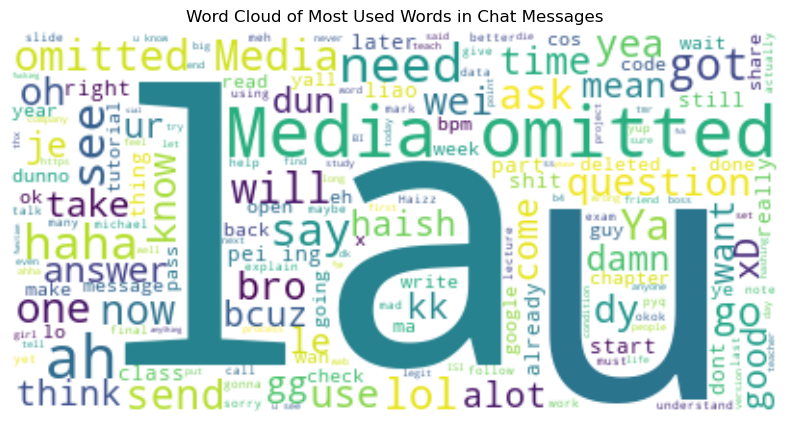

Word cloud image saved successfully as 'wordcloud_chat.png'


In [81]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Concatenate all messages into a single text string
text = " ".join(review for review in df.Message)

# Generate WordCloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Most Used Words in Chat Messages')
plt.show()

# Save the image
wordcloud.to_file("wordcloud_chat.png")
print("Word cloud image saved successfully as 'wordcloud_chat.png'")


## Total number of messages sent by each user

In [73]:
###------ Creates a list of unique Authors
l = df.Author.unique()

for i in range(len(l)):
  ###------ Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  ###------ req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Ed   ->   2140
Rohit   ->   2556


## Total messages sent on each day of the week

In [75]:
import pandas as pd

# Assuming df is already created and has the necessary columns including 'Day_of_Week'

# Get unique days of the week
days_of_week = df.Day_of_Week.unique()

# Loop through each unique day of the week
for day in days_of_week:
    # Filter messages for the current day
    req_df = df[df["Day_of_Week"] == day]
    
    # Print day and number of messages
    print(day, ' -> ', req_df.shape[0])


Wednesday  ->  1352
Thursday  ->  590
Friday  ->  579
Saturday  ->  110
Sunday  ->  709
Monday  ->  337
Tuesday  ->  1019


 ## Most active author of the chat

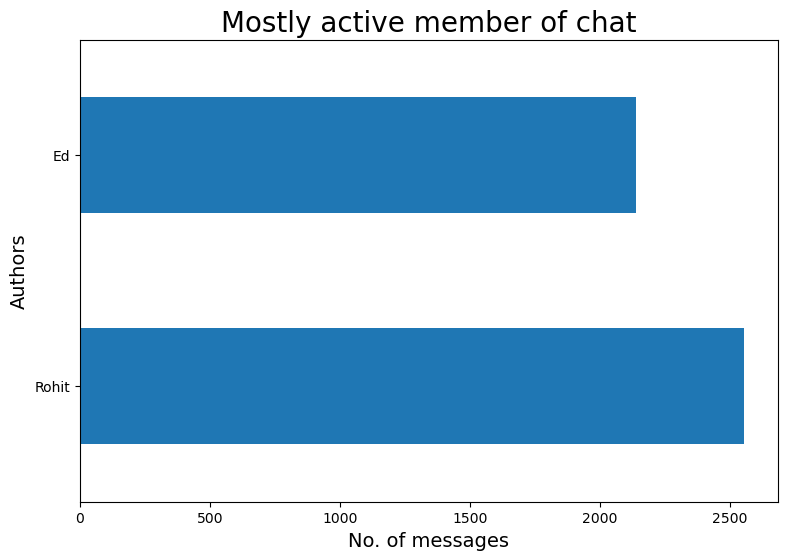

In [76]:
### ------ Most Active Author in the chat
plt.figure(figsize=(9,6))
author_value_counts = df['Author'].value_counts() #--- Number of messages per author
most_active = author_value_counts.head(10) #--- Number of messages per author for the  most active author
most_active.plot.barh() #--- Plot a bar chart using pandas built-in plotting apis

plt.xlabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of chat',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

 ## Most active day in a week

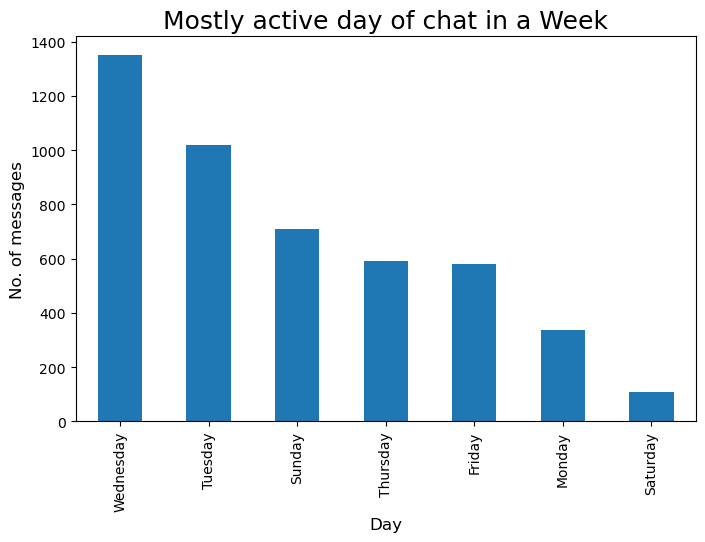

In [78]:
import matplotlib.pyplot as plt

### ------ Mostly Active day in the chat
plt.figure(figsize=(8,5))
active_day = df['Day_of_Week'].value_counts()

### ------ Most active day in the chat is : 
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of chat in a Week',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()


## Time whenever the chat was highly active

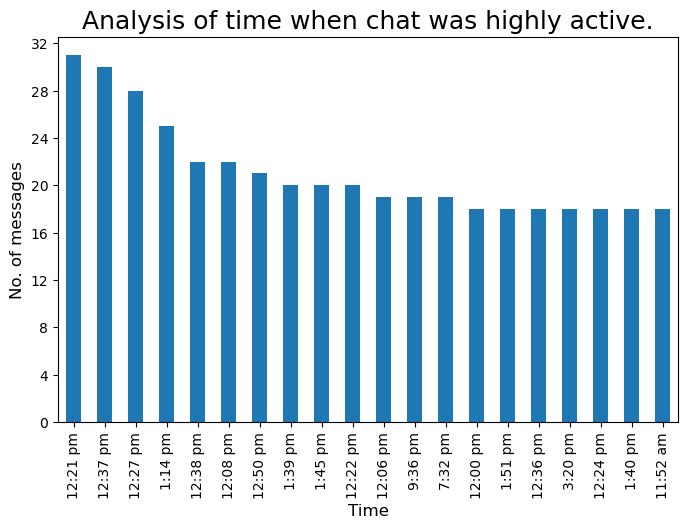

In [79]:
###------  Time whenever the chat is highly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #----- Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when chat was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

## Date on which the chat was highly active

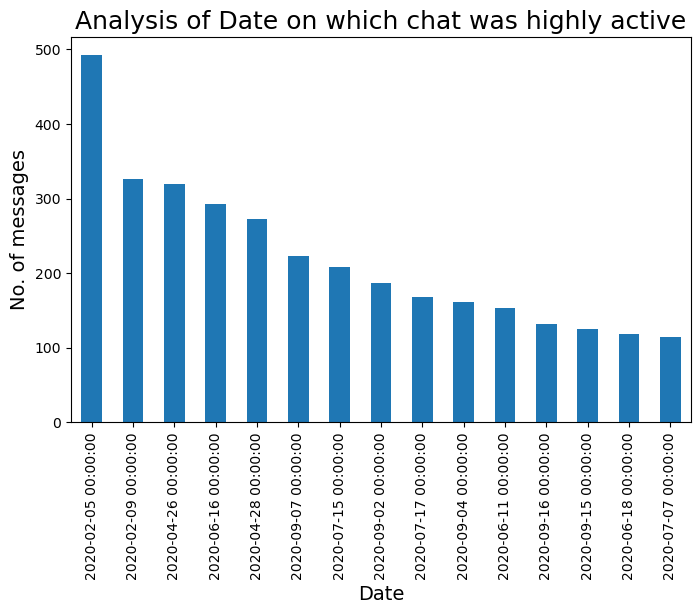

In [80]:
###---- Date on which the chat highly active.
plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which chat was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

## Sentiment Analysis

In [87]:
from textblob import TextBlob
# Assuming df is your DataFrame with preprocessed chat messages in 'Clean_Message' column
df['Sentiment'] = df['Clean_Message'].apply(lambda x: TextBlob(x).sentiment.polarity)


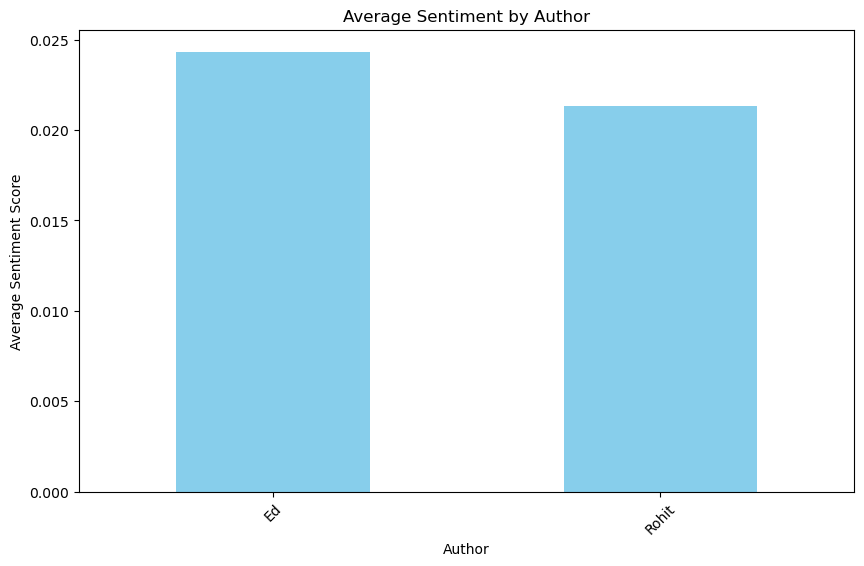

In [89]:
# Mean sentiment by author
sentiment_by_author = df.groupby('Author')['Sentiment'].mean()

# Plotting sentiment analysis results
plt.figure(figsize=(10, 6))
sentiment_by_author.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment by Author')
plt.xlabel('Author')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


         Date      Time Day_of_Week Author  \
0  2020-02-05  10:00 am   Wednesday     Ed   
1  2020-02-05  10:01 am   Wednesday     Ed   
2  2020-02-05  10:01 am   Wednesday     Ed   
3  2020-02-05  10:01 am   Wednesday  Rohit   
4  2020-02-05  10:01 am   Wednesday  Rohit   
5  2020-02-05  12:22 pm   Wednesday     Ed   
6  2020-02-05  12:22 pm   Wednesday     Ed   
7  2020-02-05  12:38 pm   Wednesday     Ed   
8  2020-02-05  12:38 pm   Wednesday     Ed   
9  2020-02-05  12:39 pm   Wednesday  Rohit   
10 2020-02-05  12:39 pm   Wednesday  Rohit   
11 2020-02-05  12:39 pm   Wednesday  Rohit   
12 2020-02-05  12:39 pm   Wednesday  Rohit   
13 2020-02-05  12:39 pm   Wednesday  Rohit   
14 2020-02-05  12:39 pm   Wednesday  Rohit   
15 2020-02-05  12:40 pm   Wednesday  Rohit   
16 2020-02-05  12:40 pm   Wednesday     Ed   
17 2020-02-05  12:40 pm   Wednesday  Rohit   
18 2020-02-05  12:40 pm   Wednesday     Ed   
19 2020-02-05  12:40 pm   Wednesday     Ed   

                                 

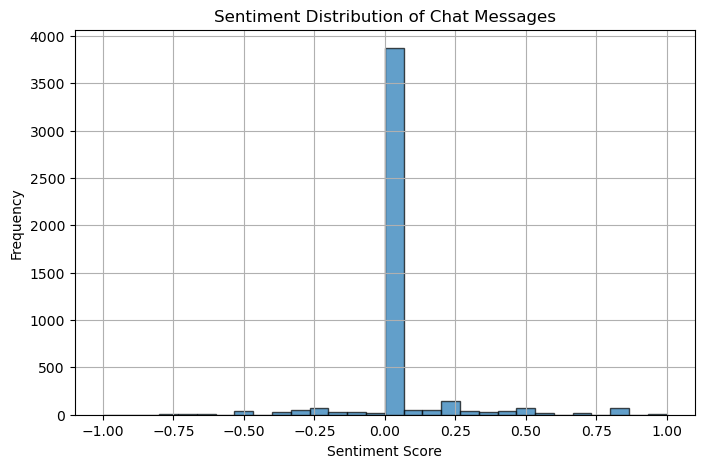

In [92]:
# Assuming df is your DataFrame with preprocessed chat messages and sentiment scores in 'Sentiment' column
print(df.head(20))  # Print the DataFrame to verify

# Analyze sentiment statistics
overall_sentiment = df['Sentiment'].mean()
print(f"Overall sentiment of the chat: {overall_sentiment:.2f}")

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Sentiment'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution of Chat Messages')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [93]:
plt.savefig('sentiment_distribution.png')


<Figure size 640x480 with 0 Axes>